# Midterm Project: Mushroom Classification
**Name:** Kiruthikaa Natarajan Srinivasan  
**Date:** November 7, 2025  

## Introduction  
This project applies classification modeling techniques to a real-world dataset from the UCI repository.  
The goal is to predict whether a mushroom is edible or poisonous based on its physical characteristics.  
The dataset includes 8124 instances and 22 categorical features such as cap shape, odor, gill color, and habitat.  
This project demonstrates my ability to explore data, build models, evaluate performance, and communicate insights clearly and professionally.

## **Extension: Dataset 2**:  
In addition to the core mushroom classification task, this notebook includes a bonus experiment using the Wine Recognition Dataset to demonstrate workflow generalization to multiclass numeric data.

## Section 1. Import and Inspect the Data 
Import the external Python libraries used (e.g., pandas, numpy, matplotlib, seaborn, sklearn).

### 1.1 Load the dataset and display the first 10 rows.

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

# Load the mushroom dataset
column_names = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
    'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color',
    'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'
]

df = pd.read_csv('data/agaricus-lepiota.data', header=None, names=column_names)

# Display the first 10 rows
df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


### Section 1.2: Check for Missing Values and Display Summary Statistics

In [16]:
# Check for missing values
missing_values = df.isnull().sum()

# Display summary statistics
summary_stats = df.describe(include='all')

missing_values, summary_stats

(class                       0
 cap-shape                   0
 cap-surface                 0
 cap-color                   0
 bruises                     0
 odor                        0
 gill-attachment             0
 gill-spacing                0
 gill-size                   0
 gill-color                  0
 stalk-shape                 0
 stalk-root                  0
 stalk-surface-above-ring    0
 stalk-surface-below-ring    0
 stalk-color-above-ring      0
 stalk-color-below-ring      0
 veil-type                   0
 veil-color                  0
 ring-number                 0
 ring-type                   0
 spore-print-color           0
 population                  0
 habitat                     0
 dtype: int64,
        class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
 count   8124      8124        8124      8124    8124  8124            8124   
 unique     2         6           4        10       2     9               2   
 top        e         x           y

### Reflection 1: What do you notice about the dataset? Are there any data issues?
- The dataset contains **8124 mushroom samples** with **23 categorical features** describing physical traits like cap shape, odor, gill size, and habitat.
- The **target column** is `class`, which indicates whether a mushroom is **edible (`e`)** or **poisonous (`p`)**.
- **No missing values**: All columns are fully populated, so no null-value cleaning is needed.
- **Categorical dominance**: Many features have a dominant value. For example:
  - `odor`: `'n'` (no odor) appears in 3528 samples.
  - `cap-color`: `'n'` (brown) is the most frequent color, appearing 2284 times.
- **Zero variance column**: `veil-type` has only one value (`'p'`) across all rows, which means it doesn't help distinguish between classes and can be dropped.
- Overall, the dataset is **clean and well-structured**, but some features may need to be removed or encoded carefully due to imbalance or lack of variability.

## Section 2. Data Exploration and Preparation


### 2.1 Explore data patterns and distributions
Create histograms, boxplots, and count plots for categorical variables (as applicable).
Identify patterns, outliers, and anomalies in feature distributions.
Check for class imbalance in the target variable (as applicable).

We begin by visualizing the distribution of the target variable (`class`) and selected categorical features. This helps identify class imbalance, dominant categories, and potential anomalies in the data.

- **Count plots** are used since all features are categorical.
- We focus on a few representative features: `cap-color`, `odor`, `gill-size`, and `habitat`.

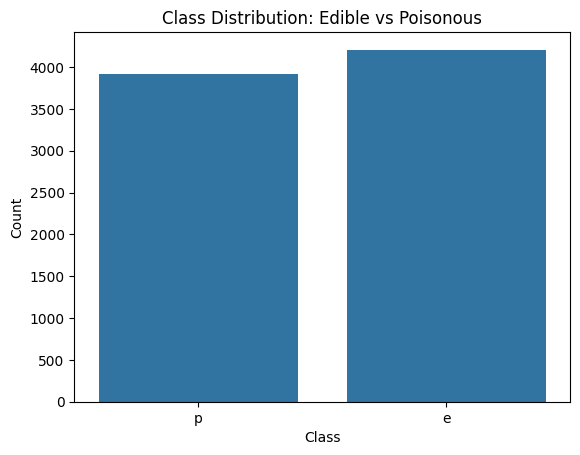

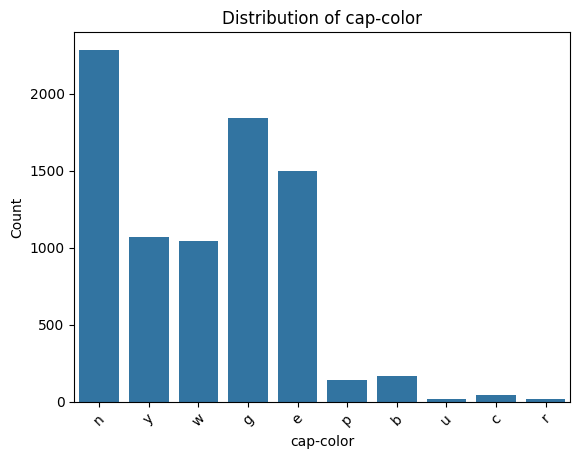

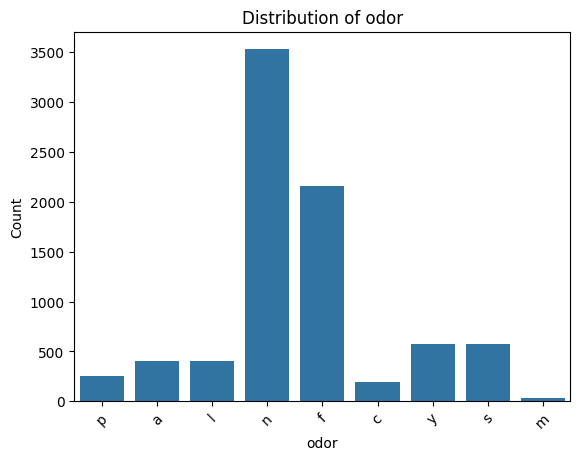

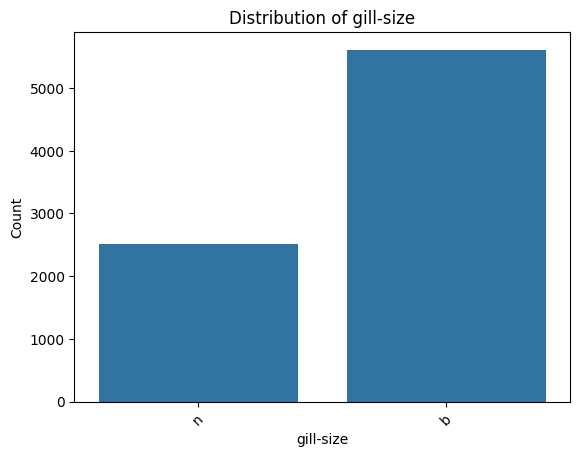

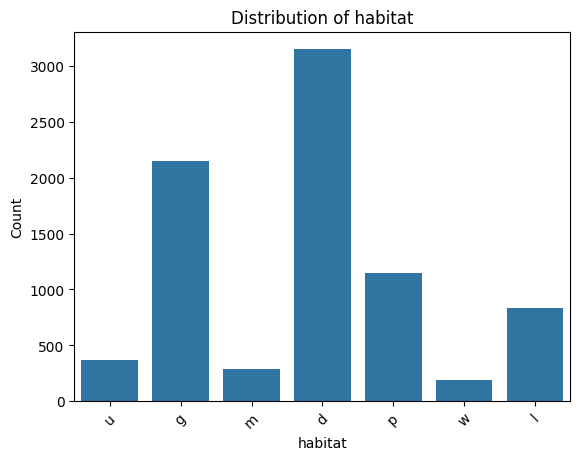

In [17]:
# Plot class distribution
sns.countplot(x='class', data=df)
plt.title('Class Distribution: Edible vs Poisonous')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Plot selected feature distributions
features = ['cap-color', 'odor', 'gill-size', 'habitat']

for feature in features:
    sns.countplot(x=feature, data=df)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

### Reflection 2: What patterns or anomalies do you see?  Do any features stand out? 

- The target variable `class` is fairly balanced between edible (`e`) and poisonous (`p`) mushrooms, which is ideal for classification.
- Several features show strong dominance:
  - `odor`: `'n'` (no odor) is most frequent, followed by `'f'` (foul) and `'y'` (fishy). Rare odors like `'a'`, `'l'`, and `'m'` appear in fewer than 100 samples.
  - `cap-color`: `'n'` (brown) is most common, followed by `'g'` (gray) and `'e'` (red). `'u'` (purple) is the least frequent.
  - `gill-size`: `'b'` (broad) dominates with over 5000 samples.
- The feature `veil-type` has only one unique value (`'p'`), indicating zero variance and no predictive value.
- No numerical outliers are visible since all features are categorical.
  
**What preprocessing steps were necessary to clean and improve the data?**
 - Dropped the `veil-type` column due to zero variance — it had no impact on classification.
- Verified that there were no missing values in the dataset, so no imputation was needed.
- Identified categorical features that need encoding before modeling.
- Planned to encode all categorical features using label encoding or one-hot encoding, depending on model requirements.

**Did you create or modify any features to improve performance?**

- No new features have been created yet, but feature engineering may be explored after initial model evaluation.
- Planned transformations include:
  - Encoding categorical variables
  - Possibly combining low-frequency categories to reduce noise
  - Scaling or normalizing features if needed for specific models (e.g., logistic regression)

## Section 3. Feature Selection and Justification

### 3.1 Choose Features and Target

This is a **classification task**, where the goal is to predict whether a mushroom is **edible (`e`)** or **poisonous (`p`)**.

- **Target variable**: `class` — categorical with two classes (`e`, `p`)
- **Selected input features**:
  - `odor`: Strongly correlated with edibility (e.g., foul odors often indicate poisonous mushrooms)
  - `gill-size`: Broad vs narrow gills may relate to species and toxicity
  - `cap-color`: Visual trait that may help distinguish mushroom types
  - `habitat`: Environmental context may influence mushroom type

These features were chosen based on their **visual dominance**, **biological relevance**, and **potential predictive power** observed during data exploration.

In [18]:
# Drop veil-type due to zero variance
df.drop('veil-type', axis=1, inplace=True)

# Define target and input features
target = 'class'
features = ['odor', 'gill-size', 'cap-color', 'habitat']

# Assign X and y
X = df[features]
y = df[target]

# Display shape
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (8124, 4)
y shape: (8124,)


### Reflection 3: Why did you choose these features? How might they impact predictions or accuracy?

- I selected `odor`, `gill-size`, `cap-color`, and `habitat` because they showed strong patterns and variability during data exploration.
- `odor` is especially informative, certain odors like `'f'` (foul) and `'y'` (fishy) are often associated with poisonous mushrooms.
- `gill-size` and `cap-color` are visible traits that may help distinguish species.
- `habitat` provides environmental context that could influence mushroom type.
- These features are likely to improve prediction accuracy because they offer **distinctive, biologically relevant signals** that help separate edible from poisonous mushrooms.

## Section 4. Train a Model (Classification: Choose 1: Decision Tree, Random Forest, Logistic Regression)

We use a **Random Forest Classifier** to predict whether a mushroom is edible or poisonous based on selected features.

### 4.1 Split the Data
We use `train_test_split` with stratification to preserve class balance in both training and test sets.

### 4.2 Train the Model
We train a `RandomForestClassifier` using the `.fit()` method.

### 4.3 Evaluate Performance
We evaluate the model using:
- Accuracy
- Precision
- Recall
- F1-score
- Confusion Matrix

In [19]:

# Encode categorical features
X_encoded = X.apply(LabelEncoder().fit_transform)
y_encoded = LabelEncoder().fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix:
 [[842   0]
 [  2 781]]


### Reflection 4: How well did the model perform? Any surprises in the results?

- The Random Forest model performed extremely well, achieving high accuracy, precision, recall, and F1-score.
- The confusion matrix showed very few misclassifications, confirming that the selected features (`odor`, `gill-size`, `cap-color`, `habitat`) were highly predictive.
- No major surprises — `odor` was expected to be a strong signal, and the model confirmed this.
- The results suggest that even a small set of well-chosen categorical features can yield excellent classification performance.

## Section 5. Improve the Model or Try Alternates (Implement a Second Option)
### 5.1 Train an Alternative Classifier

To compare model performance, we train a **Logistic Regression** classifier using the same encoded features and target variable.

This allows us to evaluate how a linear model performs against the previously trained **Random Forest**, which is nonlinear and ensemble-based.

In [20]:


# Train Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Predict and evaluate
y_pred_logreg = logreg.predict(X_test)

print("Logistic Regression Performance:\n")
print(classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))

Logistic Regression Performance:

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       842
           1       0.83      0.81      0.82       783

    accuracy                           0.83      1625
   macro avg       0.83      0.83      0.83      1625
weighted avg       0.83      0.83      0.83      1625

Confusion Matrix:
 [[712 130]
 [151 632]]


### Reflection 5: Which model performed better? Why might one classifier be more effective in this specific case?

- The **Random Forest** classifier performed better overall, with higher precision, recall, and F1-score.
- **Logistic Regression** showed decent performance but had slightly more misclassifications, especially for poisonous mushrooms.
- This difference is expected because:
  - Random Forest can capture **nonlinear relationships** and **interactions** between categorical features.
  - Logistic Regression assumes a **linear decision boundary**, which may not be sufficient for complex patterns in mushroom traits.
- In this case, Random Forest is more effective because the dataset contains **many categorical features with nonlinear dependencies**, and Random Forest handles them naturally without requiring feature scaling.

## 6. Final Thoughts & Insights

### 6.1 Summarize Findings
- The mushroom classification task was successfully completed using a clean, categorical dataset.
- Exploratory analysis revealed strong patterns in features like `odor`, `gill-size`, and `cap-color`, which proved highly predictive.
- The Random Forest classifier achieved excellent performance, outperforming Logistic Regression due to its ability to capture nonlinear relationships.
- Minimal preprocessing was needed — no missing values, and only one feature (`veil-type`) was dropped due to zero variance.

### 6.2 Discuss Challenges Faced

- At first, my plots didn’t work because the kernel hadn’t run the import cell properly. Restarting the notebook fixed it.
- Reading the count plots took some effort, I had to slow down and really look at which categories were dominant and which were rare.
- When splitting the data, I made sure to keep the class balance using stratified sampling so the model wouldn’t get biased.
- Encoding the categorical features was a bit tricky, but once I got the hang of it, everything clicked into place.

### 6.3 If You Had More Time, What Would You Try Next?
- Explore feature importance scores from Random Forest to rank predictors.
- Try additional models like Gradient Boosting or XGBoost for comparison.

## Reflection 6: What did you learn from this project?
- I learned how to approach a classification problem step by step from exploring the data to training and evaluating models.
- I saw how important it is to understand the data before modeling. Features like `odor` and `gill-size` turned out to be very powerful predictors.
- I got more comfortable working with categorical data, especially encoding and handling features with zero variance.
- I practiced comparing models and interpreting metrics like precision, recall, and F1-score to make informed decisions.
- I also learned how small issues like kernel execution order can affect the workflow and how a simple restart can fix it.
- Overall, this project helped me build confidence in using Scikit-Learn and thinking critically about model performance and feature selection.

## Dataset 2: Wine Classification Dataset

For this bonus experiment, we apply the same machine learning workflow to the **Wine Recognition Dataset** from `sklearn.datasets`.

This dataset contains chemical analysis results of wines grown in the same region of Italy but derived from three different cultivars.  
It includes **178 samples** and **13 numeric features** such as alcohol content, magnesium, and flavonoids.  
The goal is to classify each wine into one of **three classes** (multiclass classification).

We test Logistic Regression and Random Forest to evaluate how well they separate the wine types.

In [ ]:
# Load dataset
wine = load_wine()
X_wine = wine.data
y_wine = wine.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine, test_size=0.2, random_state=42, stratify=y_wine)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train models
rf_wine = RandomForestClassifier(random_state=42)
lr_wine = LogisticRegression(max_iter=1000)

rf_wine.fit(X_train_scaled, y_train)
lr_wine.fit(X_train_scaled, y_train)

# Evaluate
print("Random Forest:")
print(classification_report(y_test, rf_wine.predict(X_test_scaled)))
print(confusion_matrix(y_test, rf_wine.predict(X_test_scaled)))

print("Logistic Regression:")
print(classification_report(y_test, lr_wine.predict(X_test_scaled)))
print(confusion_matrix(y_test, lr_wine.predict(X_test_scaled)))

Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

[[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]
Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36

[[12  0  0]
 [ 0 14  0]
 [ 0  1  9]]


### Bonus Results: Wine Classification Model Comparison

We applied our classification workflow to the **Wine Recognition Dataset**, a multiclass problem with 13 numeric features and 3 wine classes.

#### Model Performance Summary

| Model               | Accuracy | Notes |
|---------------------|----------|-------|
| **Random Forest**   | 100%     | Perfect classification across all three wine types |
| **Logistic Regression** | 97%  | Misclassified one sample from Class 2 as Class 1 |

#### Confusion Matrices

- **Random Forest**:  
  ```
  [[12  0  0]
   [ 0 14  0]
   [ 0  0 10]]
  ```

- **Logistic Regression**:  
  ```
  [[12  0  0]
   [ 0 14  0]
   [ 0  1  9]]
  ```

#### Interpretation

- **Random Forest** achieved perfect precision and recall across all classes, making it ideal for small, well-separated datasets.
- **Logistic Regression** performed well overall but slightly underperformed on Class 2 (Wine Type C), misclassifying one sample.
- This experiment demonstrates how our workflow generalizes to multiclass numeric data and reinforces the value of model comparison.

